<a href="https://colab.research.google.com/github/Nada-Elghaweet/Ai-safety-system/blob/CNN_IMGS/CNN_Saftey_IMGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls /content/

 sample_data  'VIOLENCE VS NON_VIOLENCE.zip'


In [2]:
import os
os.rename("/content/VIOLENCE VS NON_VIOLENCE.zip", "/content/VIOLENCE_vs_NON_VIOLENCE.zip")
zip_path = "/content/VIOLENCE_vs_NON_VIOLENCE.zip"

In [3]:
import zipfile
import os
extract_path = '/content/VIOLENCE_vs_NON_VIOLENCE'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
dataset_path = os.path.join(extract_path, 'VIOLENCE VS NON_VIOLENCE')
os.listdir(dataset_path)

['train', 'val', 'test']

In [5]:
train_path = os.path.join(dataset_path, 'train')
val_path   = os.path.join(dataset_path, 'val')
test_path  = os.path.join(dataset_path, 'test')

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [7]:
img_size = (128, 128)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2] ##to simulate diff lighting
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=16,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=16,
    class_mode='binary'
)

Found 700 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


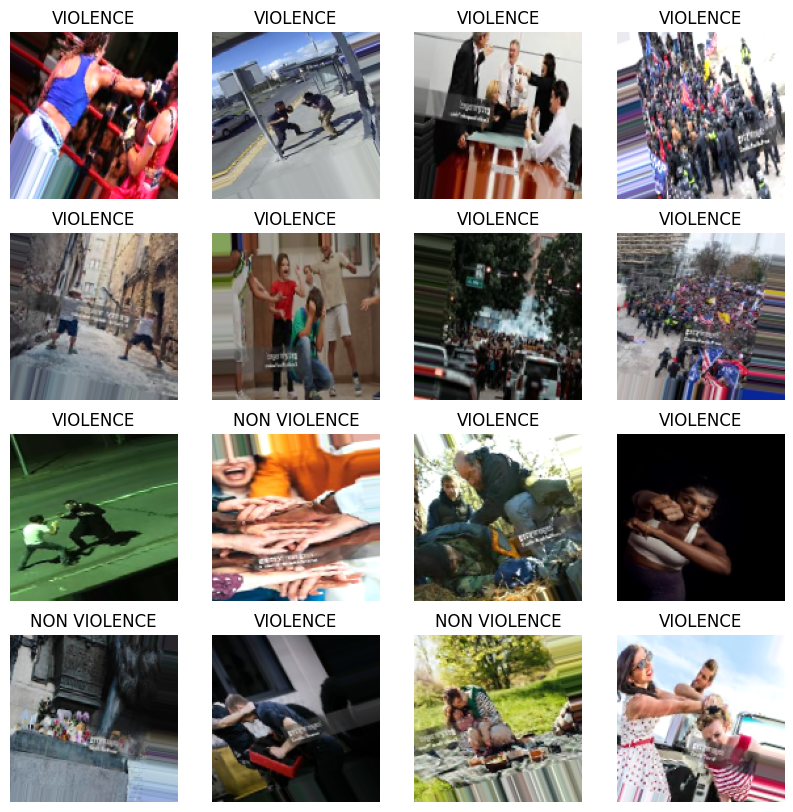

In [8]:
plt.figure(figsize=(10, 10)) #EDA
for i , (img, label) in enumerate(train_generator):
  for j in range(16):
    ax = plt.subplot(4, 4, j+1)
    plt.imshow(img[j])
    plt.axis('off')
    if label[j] == 1:
      plt.title('VIOLENCE')
    else :
      plt.title('NON VIOLENCE')
  break
plt.show()


In [9]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # freeze all layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,621,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,879,681 (18.61 MB)

 Trainable params: 2,621,697 (10.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
history = model.fit(train_generator , validation_data= val_generator , epochs= 7)

Epoch 1/7


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 531ms/step - accuracy: 0.5831 - loss: 1.1015 - val_accuracy: 0.7564 - val_loss: 0.5043
Epoch 2/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.6892 - loss: 0.6393 - val_accuracy: 0.7564 - val_loss: 0.4826
Epoch 3/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.7459 - loss: 0.5336 - val_accuracy: 0.8077 - val_loss: 0.4759
Epoch 4/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7462 - loss: 0.4933 - val_accuracy: 0.7628 - val_loss: 0.5048
Epoch 5/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.8217 - loss: 0.4337 - val_accuracy: 0.7885 - val_loss: 0.4694
Epoch 6/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7830 - loss: 0.4875 - val_accuracy: 0.7821 - val_loss: 0.4685
Epoch 7/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7800 - loss: 0.4711 - val_accuracy: 0.7949 - val_loss: 0.4558


Text(0.5, 1.0, 'Loss Curves')

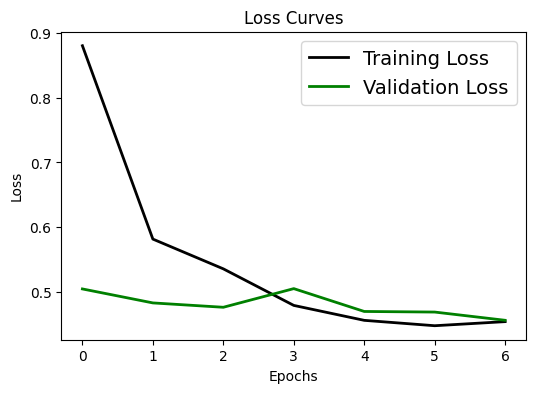

In [12]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'] , fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

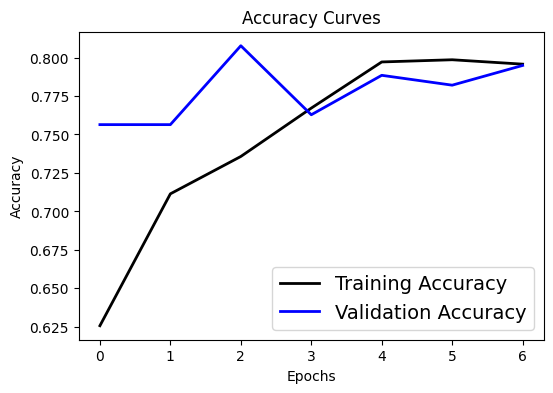

In [13]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

Found 117 images belonging to 2 classes.


In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8110 - loss: 0.4442
Test Loss: 0.4516334533691406
Test Accuracy: 0.8034188151359558
